# Case study on Pre-processing

# Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

## 1.Load the dataset into python environment 

In [3]:
# importing data set in to python envirinment 
df= pd.read_csv("titanic_dataset.csv")

In [4]:
#first five rows of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Last five rows of dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 2.Make ‘PassengerId’ as the index column 

In [6]:
#Make ‘PassengerId’ as the index column
df=df.set_index("PassengerId")

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.Check the basic details of the dataset 

In [8]:
#shape of the dataset
df.shape

(891, 11)

In [9]:
#columns present in the dataset
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
df.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [12]:
# Checking null values
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

* There are 177 rows with missing Age,687 rows with missing Cabin and 2 rows with missing Embarked information

In [13]:
# Checking null values
df.isna().sum().sum()

866

<AxesSubplot:ylabel='PassengerId'>

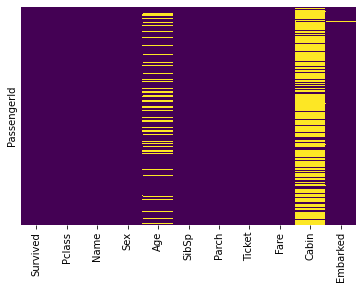

In [14]:
sns.heatmap(df.isnull(),yticklabels= False,cbar=False,cmap="viridis")

* From the diagram the column "Age" and "Cabin" have got null values."Cabin " has huge amount of null values, "Age" having moderate amount of null values

In [15]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

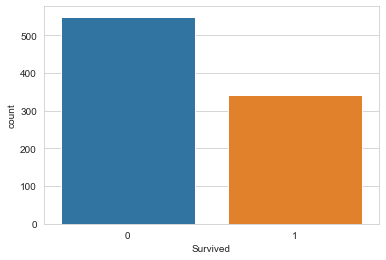

In [16]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df)

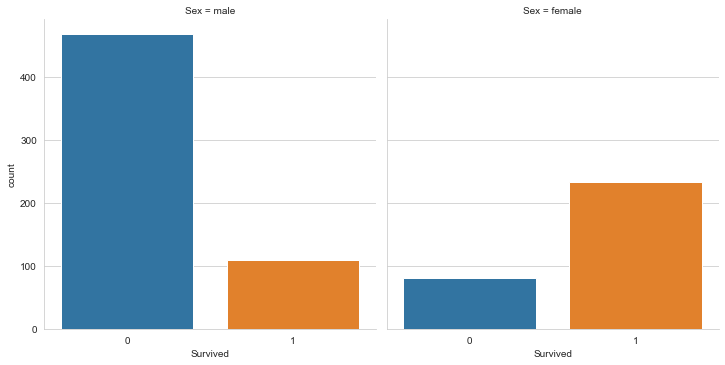

In [17]:
sns.factorplot(x="Survived",col="Sex",kind="count",data=df)

INSIGHT: 
* More number of male passengers have died than female ones

<AxesSubplot:xlabel='Sex', ylabel='count'>

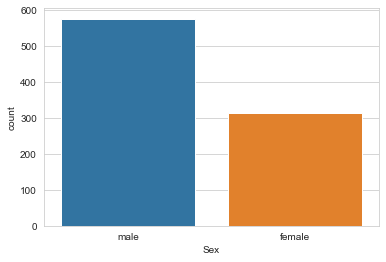

In [18]:
sns.countplot(df["Sex"])

* Male passengers are high as compared to females.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

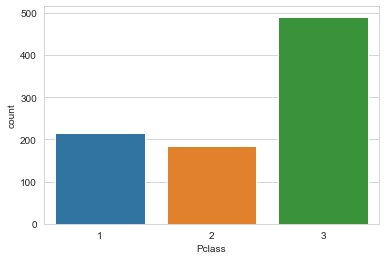

In [19]:
sns.countplot(df["Pclass"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

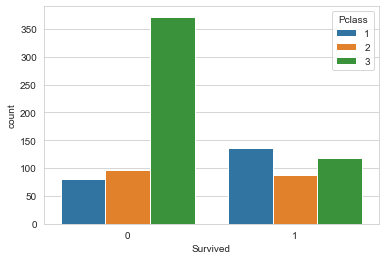

In [20]:
sns.countplot(x="Survived",hue="Pclass",data=df)

* More number of passengers travelled in class 3 .
* Pclass 3 were more likely to be survived

<AxesSubplot:xlabel='SibSp', ylabel='count'>

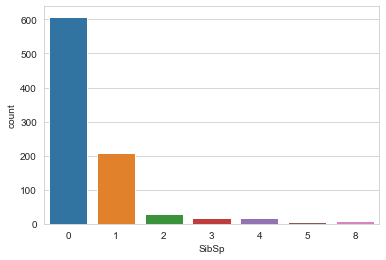

In [21]:
sns.countplot(df["SibSp"])

<AxesSubplot:xlabel='Parch', ylabel='count'>

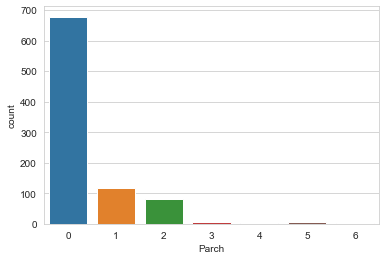

In [22]:
sns.countplot(df["Parch"])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

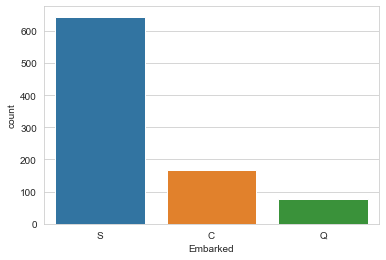

In [23]:
sns.countplot(df["Embarked"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

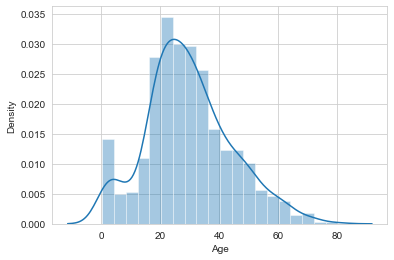

In [24]:
#numerical attributes
sns.distplot(df["Age"])

INSIGHT:
* Histograms that is a clear bell curve, that is uniform distibution and majority of the passengers are in the range of20 to 30.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

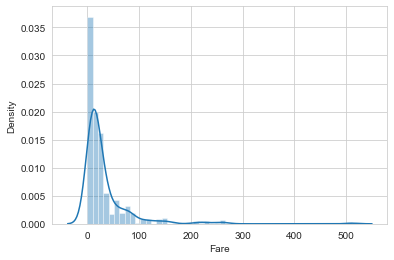

In [25]:
sns.distplot(df["Fare"])

"Fare" is ranging around 0 to 500.

In [26]:
# Getting descriptive statistics summary of dataset
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

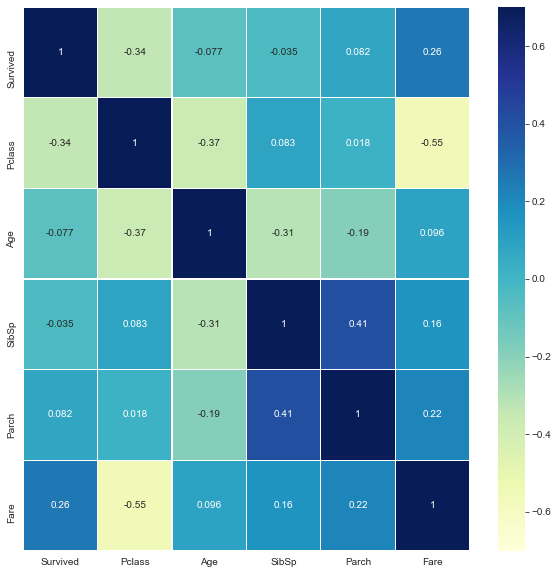

In [27]:
corr= df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,vmin=-0.7, vmax=0.7,linewidths=0.2,annot=True,cmap="YlGnBu")

##  4.Fill in all the missing values present in all the columns in the dataset

In [28]:
#filling missing values
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [29]:
# dropping "Cabin" as too much missing data
df=df.drop(["Cabin"], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
df.shape
#cabin has been dropped

(891, 10)

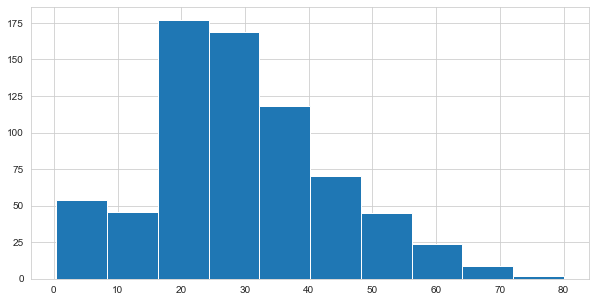

In [31]:
freqgraph=df["Age"]
freqgraph.hist(figsize=(10,5))
plt.show()

In [32]:
#mean value of age
df["Age"].mean()

29.69911764705882

In [33]:
#fill missing values using mean of that numerical column
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [34]:
df["Embarked"].mode()[0]

'S'

In [35]:
#fill missing values using mode of the catergorical column
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [36]:
# Checking null values
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [37]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 5.Check and handle outliers in at least 3 columns in the dataset 

Text(0.5, 1.0, 'Box plot of Pclass')

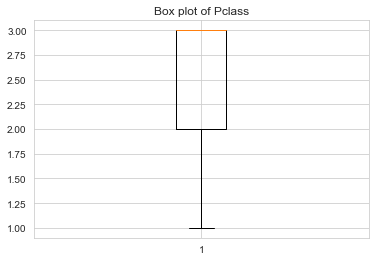

In [38]:
#checking outliers for "Pclass " column
plt.boxplot(df["Pclass"])
plt.title("Box plot of Pclass")

* No outliers present in "Pclass"

Text(0.5, 1.0, 'Box plot of Age')

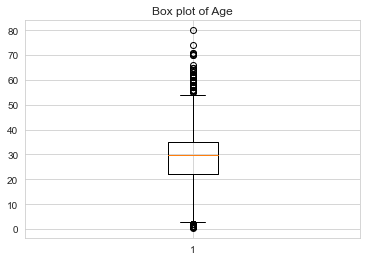

In [39]:
#checking outliers for "Age" column
plt.boxplot(df["Age"])
plt.title("Box plot of Age")

* There is outliers are present in "Age"

In [40]:
#finding different quartile values of Age 
Q1= np.percentile(df["Age"],25,interpolation="midpoint")
Q2= np.percentile(df["Age"],50,interpolation="midpoint")
Q3= np.percentile(df["Age"],75,interpolation="midpoint")

In [41]:
print(Q1)
print(Q2)
print(Q3)

22.0
29.69911764705882
35.0


In [42]:
df["Age"].median()

29.69911764705882

In [43]:
#finding IQR
IQR= Q3-Q1

In [44]:
IQR

13.0

In [45]:
#finding lower limit & upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.5
54.5


In [46]:
#removing all the value below lower limit & above upper limt
outlier=[]
for x in df["Age"]:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)

In [47]:
#finding outliers
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [48]:
#finding index of this outliers & droping
ind1=df["Age"]>up_lim
df.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [49]:
df.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace= True)

In [50]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


Text(0.5, 1.0, 'Box plot of Age')

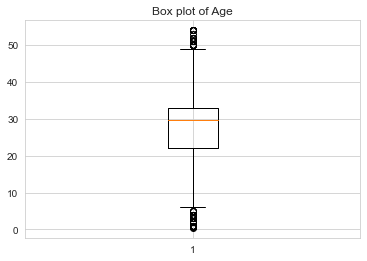

In [51]:
#checking outliers for "Age " column
plt.boxplot(df["Age"])
plt.title("Box plot of Age")

Text(0.5, 1.0, 'Box plot of Fare')

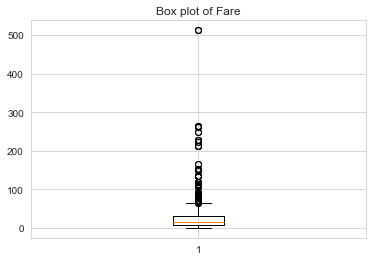

In [52]:
#checking outliers for "Fare" column
plt.boxplot(df["Fare"])
plt.title("Box plot of Fare")

In [53]:
#finding different quartile values of Fare
Q1= np.percentile(df["Fare"],25,interpolation="midpoint")
Q2= np.percentile(df["Fare"],50,interpolation="midpoint")
Q3= np.percentile(df["Fare"],75,interpolation="midpoint")

In [54]:
print(Q1)
print(Q2)
print(Q3)

7.8958
14.1083
30.5


In [55]:
#finding IQR
IQR= Q3-Q1

In [56]:
IQR

22.6042

In [57]:
#finding lower limit & upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.0105
64.4063


In [58]:
#removing all the value below low limit& above upper limt
outlier=[]
for x in df["Fare"]:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)

In [59]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [60]:
#finding index of this outliers & droping
ind3=df["Fare"]>up_lim
df1=df.loc[ind1].index

In [61]:
print (*df1)

In [62]:
df.drop([2 ,28, 32, 35, 53, 62, 63, 73, 89, 103, 119, 121, 125, 140, 152, 160, 181, 202, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 592, 610, 616, 628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 755, 760, 764, 766, 780, 790, 793, 803, 821, 836, 847, 850, 857, 864],inplace= True)

In [63]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


Text(0.5, 1.0, 'Box plot of Fare')

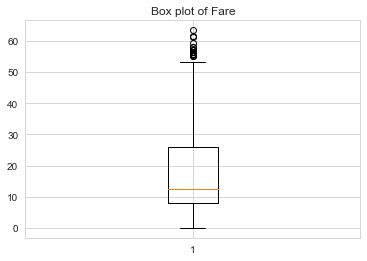

In [64]:
#checking outliers for "Fare" column
plt.boxplot(df["Fare"])
plt.title("Box plot of Fare")

Text(0.5, 1.0, 'Box plot of SibSp')

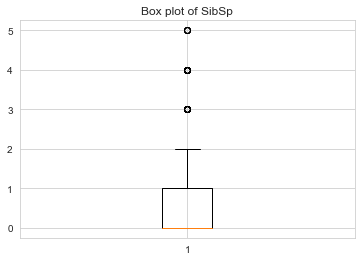

In [65]:
#checking outliers for "SibSp" column
plt.boxplot(df["SibSp"])
plt.title("Box plot of SibSp")

In [66]:
#finding different quartile values of sibsp
Q1= np.percentile(df["SibSp"],25,interpolation="midpoint")
Q2= np.percentile(df["SibSp"],50,interpolation="midpoint")
Q3= np.percentile(df["SibSp"],75,interpolation="midpoint")

In [67]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [68]:
#finding IQR
IQR= Q3-Q1
IQR

1.0

In [69]:
#finding lowe limit & upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [70]:
#removing all the value below low limit& above upper limt
outlier=[]
for x in df["SibSp"]:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)

In [71]:
outlier

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [72]:
#finding index of this outliers & droping
ind3=df["SibSp"]>up_lim
df.loc[ind3].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [73]:
df.drop([8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],inplace= True)

Text(0.5, 1.0, 'Box plot of SibSp')

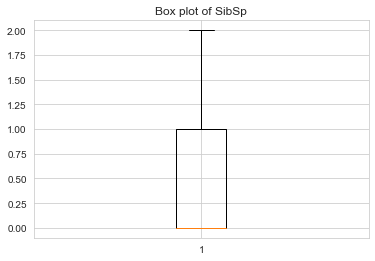

In [74]:
#checking outliers for "SibSp" column
plt.boxplot(df["SibSp"])
plt.title("Box plot of SibSp")

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [75]:
df.shape

(705, 10)

In [76]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [77]:
df.Name.nunique()

705

In [78]:
df.drop("Ticket",axis=1,inplace=True)

In [79]:
df.drop("Name",axis=1,inplace=True)

In [80]:
df=pd.get_dummies(df,columns=['Pclass','Sex','Embarked'])

In [81]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
3,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
6,0,29.699118,0,0,8.4583,0,0,1,0,1,0,1,0


In [82]:
y=df["Survived"]
x=df.drop("Survived",axis=1)

In [83]:
from sklearn.model_selection import train_test_split
#split the Dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)

In [84]:
#perform linear regression
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
#make prediction using the model
predictions=model.predict(x_test)

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 0.16788834484793613


In [86]:
rsquare= r2_score(y_test,predictions)
print('R2 value:',r2_score(y_test,predictions))

R2 value: 0.30111959131796573


In [87]:
x= df.drop("Survived",axis=1)

In [88]:
x.describe()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,28.497462,0.283688,0.292199,16.779822,0.134752,0.238298,0.626950,0.314894,0.685106,0.156028,0.096454,0.747518
std,10.263420,0.512988,0.762963,13.139205,0.341701,0.426345,0.483958,0.464803,0.464803,0.363140,0.295422,0.434745
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.879200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.699118,0.000000,0.000000,11.133300,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,33.000000,1.000000,0.000000,24.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,54.000000,2.000000,6.000000,63.358300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [90]:
x= min_max.fit_transform(x)
x=pd.DataFrame(x)

In [91]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,705.000000,705.000000,705.00000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,0.524029,0.141844,0.04870,0.264840,0.134752,0.238298,0.626950,0.314894,0.685106,0.156028,0.096454,0.747518
std,0.191553,0.256494,0.12716,0.207379,0.341701,0.426345,0.483958,0.464803,0.464803,0.363140,0.295422,0.434745
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.402762,0.000000,0.00000,0.124359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.546456,0.000000,0.00000,0.175720,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.608063,0.500000,0.00000,0.378798,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Submitted by VARSHA M